In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
sentiment = SentimentIntensityAnalyzer()

In [4]:
df = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter='\t')

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.shape

(3150, 5)

In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [10]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [11]:
rating = df['rating'].value_counts()

In [12]:
num = rating.index

In [13]:
qua = rating.values

In [14]:
color = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']

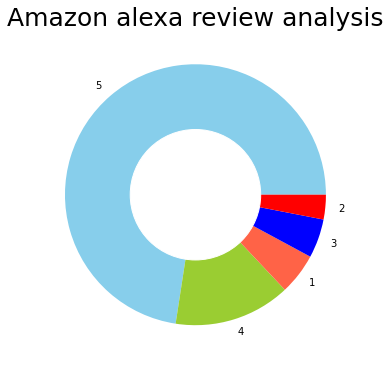

In [15]:
plt.figure(figsize=(6,6))
plt.pie(qua, labels=num, colors=color)
circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.rc('font', size=10)
plt.title('Amazon alexa review analysis', fontsize=25)
plt.show()

In [16]:
sentiment = SentimentIntensityAnalyzer()

In [17]:
df['positive'] = [sentiment.polarity_scores(i)['pos'] for i in df['verified_reviews']]
df['negative'] = [sentiment.polarity_scores(i)['neg'] for i in df['verified_reviews']]
df['neutral'] = [sentiment.polarity_scores(i)['neu'] for i in df['verified_reviews']]

In [18]:
df

,rating,date,variation,verified_reviews,feedback,positive,negative,neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0.380,0.000,0.620
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0.000,0.000,1.000
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0.237,0.028,0.735
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0.087,0.087,0.827


In [19]:
a = sum(df['positive'])
b = sum(df['negative'])
c = sum(df['neutral'])

In [20]:
def greater(m,n,o):
    if (m>n) and (m>o):
        print('Positive')
    elif (n>m) and (n>o):
        print('Negative')
    else :
        print('Neutral')
        

In [21]:
greater(a,b,c)

Neutral


In [22]:
print('Positive : ', a)
print('Negative : ', b)
print('Neutral : ', c)

Positive :  1035.4579999999983
Negative :  96.79999999999995
Neutral :  1936.740999999996
